<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM452/Chemical_Kinetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Numerical Integration of first order rate laws


## First order

We want to numerically integrate the rate laws for the first order equilibrium, A->B. First we define a function to describe our rate equations. 

In [ ]:
def rxn1st(M,t,k1):
   
  r1=k1*M[0] #k1*(concentation of A) 
  
  dAdt=-r1 #rate of change of A decreased by forward reaction and increased by reverse reaction
  dBdt=r1 #rate of change of B increased by forward reaction and decreased by reverse reaction
  
  return(dAdt,dBdt)

Here we have defined a function, rxn, that returns the derivatives of A and B as given by the rate laws. This is necessary for the differential equation solver. In addition we need to set up a few variables like the times we want to evaluate, the initial concentrations, and the rate constants.

Here, for no particular reason, we assign $M_0$ as the vector containing the initial concentrations [A]<sub>0</sub> and [B]<sub>0</sub> and assign them values of 1 and 0, respectively.

Then call the Ordinary Differential Equation INTegrator function (odeint) using the rxn1st function we defined above, the initial concentration vector (M0), the times we want to evaluate (t), and the rate constants.

In [ ]:
t=np.linspace(0,10,101) # define t. The first number is the beginning point, the second number is the end, and the third is the number of points.
M0=[1,0] #initial concentrations of A and B
k1=1 # the one rate constant
C=odeint(rxn1st,M0,t,args=(k1,)) # solve the DEs. Not sure why the last , is necessary but it seems to work with it there.

After solving, the result is stored in C, one column of numbers for each species in the reaction. Here we can separate it out by getting all of the first column (column 0) and assigning it to cA and all of column 1 and assigning it to cB.

In [ ]:
cA=C[:,0] #define cA to give the concentration from the first (zeroth) column of the C array
cB=C[:,1] #define cB to give the concentration from the second column of the C array

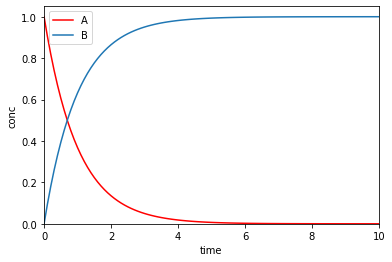

In [ ]:
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,label='B')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(cA))
plt.legend()
plt.show()

See what would change if you make $k=10$ or $k=0.1$. \\
See what would change if you make $[A]_o=0.5$ or $[B]_o=0.5$.


#Equilibrium (first order both ways)
Of course we can analytically solve the first order rate law quite easily without a computer. We can fix up our function to cover more complex cases by including the backward reaction. For now we'll assume first order in both directions.

In [ ]:
def rxn1st_equilibrium(M,t,k1,k2):
   
  r1=k1*M[0] #k1*(concentation of A)
  r2=k2*M[1]
  
  dAdt=-r1+r2 #rate of change of A decreased by forward reaction and increased by reverse reaction
  dBdt=r1-r2 #rate of change of B increased by forward reaction and decreased by reverse reaction
  
  return(dAdt,dBdt)

Combining the setup concentrations, rate constants, solving the set of differential equations, and plotting...

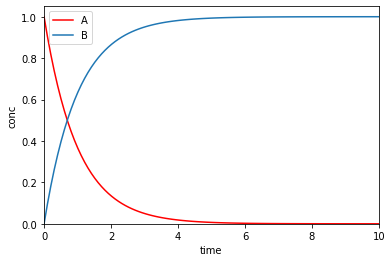

In [ ]:
t=np.linspace(0,10,100)

M0=[1,0] #A0 and B0
k1=1 #fwd reaction
k2=0 #bkwd reaction

C=odeint(rxn1st_equilibrium,M0,t,(k1,k2))
cA=C[:,0] 
cB=C[:,1]
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,label='B')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(cA))
plt.legend()
plt.show()

Using the constants and initial concentrations given should give us the same result as we got with only the forward reaction. 

Modify the code below to graph the concentations of A and B if $[A]_o$=1 and $[B]_o=0$ for k<sub>1</sub>=1 and k<sub>2</sub>=.5 \\
How do things change? \\


In [ ]:
t=np.linspace(0,10,100)
M0=[ , ]
k1=
k2= 

C=odeint(rxn1st_equilibrium,M0,t,(k1,k2))
cA=C[:,0]
cB=C[:,1]
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,label='B')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(cA))
plt.legend()

What happens if $k_2$ is twice as big as $k_1$?




In [ ]:
t=np.linspace(0,10,100)
M0=[ , ]
k1=
k2=

C=odeint(rxn1st_equilibrium,M0,t,(k1,k2))
cA=C[:,0]
cB=C[:,1]
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,label='B')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(cA))
plt.legend()

Try some other values of initial concentrations and rate constants. 


## Second order

Modify the orginal function to calculate second order reactions (both directions). In Python, powers are signified by \*\*, as in 2\**3=8.

In [ ]:
def rxn2nd(M,t,k1,k2):
   
  r1=   #forward
  r2=   #backward
  
  dAdt=-r1+r2 #rate of change of A decreased by forward reaction and increased by reverse reaction
  dBdt=r1-r2 #rate of change of B increased by forward reaction and decreased by reverse reaction
  
  return(dAdt,dBdt)

Plot for $k_1$=1, $k_2$=0, $A_0$=1, and $B_0$=0

Modify rate constants and concentrations and justify the results.

Plot for $k_1$=1, $k_2$=0.5, $A_0$=1, and $B_0$=0

*How does this differ from the first order equilibrium?*

## Multi step reactions

Modify to calculate for reactions A$\rightarrow$B and also A$\rightarrow$C at the same time.


In [31]:
def rxn(M,t,k1,k2 ):
   
  r1=k1*M[0] #k1*(concentation of A)
  r2=k2*M[0] #k2*(concentration of B)
  dAdt=-r1-r2 #A decreased by each reaction
  dBdt=r1 # B changed by first reaction
  dCdt=r2
  return(dAdt,dBdt,dCdt)

In [ ]:
#@title rate constants { run: "auto" }
k1 = 0.5 #@param {type:"slider", min:0, max:10, step:0.5}
k2 = 1 #@param {type:"slider", min:0, max:10, step:0.5}
t=np.linspace(0,10,100)
M0=[1,0,0] # initial concentrations 


C=odeint(rxn,M0,t,(k1,k2 ))
cA=C[:,0] 
cB=C[:,1] 
cC=C[:,2]
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,'b-',label='B')
plt.plot(t,cC,'cyan',linestyle='-',label='C')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(cA)) # make the upper y-limit 5% higher than the initial cA
plt.legend()
plt.show()

**Predict results and plot for $k_1>>k_2$, for $k_1<<k_2$, and for $k_1≈k_2$.**


**Modify (below) to calculate for a reaction like A$\rightleftharpoons$B$\rightarrow$C**

Use variable names that are easy to decipher later. You might use `r1f=` and `r1b=` along with `k1f` and `k1b` for step 1 **f**orward and **b**ackward.

**What additional terms will be needed? **

**Will any change be needed to plot the results?**

In [ ]:
def rxn(M,t,k1,k2 ):
   
  r1=k1*M[0] #k1*(concentation of A)
  r2=k2*M[1] #k2*(concentration of B)
  dAdt=-r1 #rate of change of A decreased by forward reaction and increased by reverse reaction
  dBdt=r1-r2 #rate of change of B increased by forward reaction and decreased by reverse reaction
  dCdt=r2
  return(dAdt,dBdt,dCdt)

In [ ]:
t=np.linspace(0,10,100)
M0=[1,0,0]
k1=5
k2=.1 
k3=1
C=odeint(rxn,M0,t,(k1,k2,k3))
cA=C[:,0] 
cB=C[:,1] 
cC=C[:,2] 
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,'b-',label='B')
plt.plot(t,cC,'-',color='purple',label='C')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(cA))
plt.legend()
plt.show()

**Predict results and plot for $k_{1f}>>k_2/k_{1b}$, for $k_{1f}<<k_2/k_{1b}$, and for $k_1≈k_2/k_{1b}$.**


#Approximate Methods
It's nice to be able to solve the equations numerically and get graphs of the concentration. These graphs result in complete descriptions of how things change but, consisting solely of lists of numbers, it can be difficult, especially as the mechanisms get more complicated, to accuratly describe or predict the differences expected between similar mechanisms. 
In addition to numerically solving for the concentrations, it is also possible to apply one of two major approximations and get symbolic results.
##Equilibrium approximation
If a later step in the mechanism is slow (rate determining) and an earlier step is an equilibrium, the rate law overall will be the rate law of the slow step which will almost certainly contain an intermediate. The equilibrium approximation is applied by assuming that equilibrium for the early step is achieved and so the concentration of the intermediate can be determined in terms of the reactants. 

For a first-order reaction, A$\rightleftharpoons$B$\rightarrow$C, having forward and backward rate constants of $k_1$ and $k_{-1}$ and a second step rate constant of $k_2$ which will be small, if equilibrium is estabilished, $k_1[A]=k_{-1}[B]$ so the intermediate [B] will have a concentration of $[B]=\dfrac{k_1[A]}{k_{-1}}$ and the reaction will have an overall rate determined from the second step of $$rate=k_2[B]=k_2\dfrac{k_1[A]}{k_{-1}}$$

Of course the second step does not have a rate of zero so the first step does not truly reach equilibrium and the concentration of [B] is presumably zero at the beginning whereas the approximation suggests that it is always some non-zero fraction of [A]. However, for reactions that have a slow step after an equilibrium step, this approximation is likely a reasonable one.

The equilibrium approximation is also called the pre-equilibrium approximation or the prior-equilibrium approximation to suggest that the equilibruim occurs prior to the rate determining step.

## Steady-state approximation
In the opposite case where slow step occurs first, an appropriate approximation would assume that all the intermediate gets used as soon as it is formed so the rate of formation of intermediate is effectively zero. For a first-order reaction, A$\rightleftharpoons$B$\rightarrow$C, having forward and backward rate constants of $k_1$ and $k_{-1}$ and a second step rate constant of $k_2$ the steady-state approximation would indicate that $$\dfrac{d[B]}{dt}=k_1[A]-k_{-1}[B]-k_2[B]≈0 $$
Now we can solve this equation for [B] and find the overall rate of formation of the product, C, using this expression. If there are more intermediates and they are needed for the overall rate law, we can use the steady state approximation on all of them.
The steady-state approximation does not require that the formation of product is fast; it only requires that the intermediate not change significantly in concentration. If the backwards first step is fast and removes the intermediate as quickly as soon as it's formed, that's good enough. In this way the steady-state approximation also fits some cases covered by the equilibrium approximation.

**Now let's apply approximations and see when they fit best. **

In [ ]:
#These are just copied from above so that we can easily make adjustments. We can easily change them to work for other reactions too but we would need to define a new function to return the rates of each species.
t=np.linspace(0,10,100)
M0=[1,0,0]
k1=1
k2=.1 
k3=.1
C=odeint(rxn,M0,t,(k1,k2,k3))
cA=C[:,0]
cB=C[:,1]
cC=C[:,2]

In [ ]:
B_ss=[]
B_pe=[]
for ca in cA: # for each value of cA from above
  B_ss.append( ) # input the expression that would calculate the result for [B] according to the steady state calculation
  B_pe.append( ) # input the expression that would calculate the result for [B] according to the pre-equilibrium calculation
plt.plot(t,cB,'b-',label='exact solution')
plt.plot(t,B_ss,'r--',label='steady state')
plt.plot(t,B_pe,'g--',label='prior equilibrium')
plt.xlim(0,max(t))
plt.ylim(0,1)
plt.legend()
plt.show()

Let's determine the \%deviation for each method.

In [ ]:
ratio_ss=[]
ratio_pe=[]
for i in range(1,len(t)): #start at 1 to avoid division by zero
  ratio_ss.append((B_ss[i]-cB[i])/cB[i]*100) #percent difference of approximation
  ratio_pe.append(abs(B_pe[i]-cB[i])/cB[i]*100) #percent difference
plt.plot(t[1:],ratio_ss,label='ss') # use all values of t after the zeroth one.
plt.plot(t[1:],ratio_pe,label='pe')
plt.ylim(-100,100)
plt.legend()
plt.ylabel('% deviation from actual concentration')
plt.xlabel('time')
plt.show()

Try values of the $k$'s so that the steady state approximation has the lowest absolute error and values of the $k$'s such that the pre-equilibrium approximation has the lowest absolute error.